<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/08_Image_FFT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09 - Image - Compression with Singular Value Decomposition

Csak egy kis móka.

https://youtu.be/QQ8vxj-9OfQ?t=570

https://www.youtube.com/watch?v=H7qMMudo3e8&ab_channel=SteveBrunton

Az elöző részben:

Azt láttuk, hogy nagyon lassan tanulja ráadásul rosszul becsüli a képből vett sorokat, pedig ez egy könnyű feladat lenne.

Ezért két másik módszert vizsgálunk meg.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [3]:
import skimage.io
import skimage.transform

In [5]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman3.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(444, 788, 3)


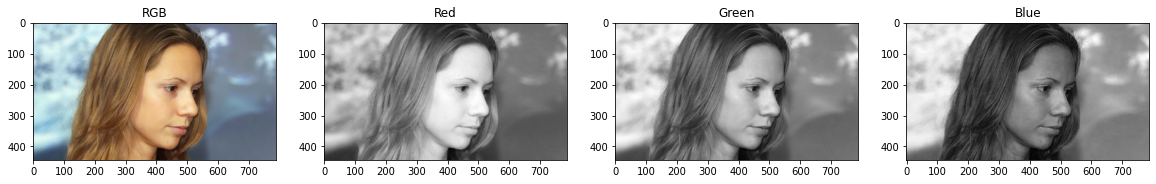

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [7]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman3.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic, w=5, h=8):
  fig, (ax1) = plt.subplots(1, 1, figsize=(w, h))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()


def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):
  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 2])/3

  return grey_


<class 'numpy.ndarray'>
(444, 788, 3)
float64
0.9586084702435661


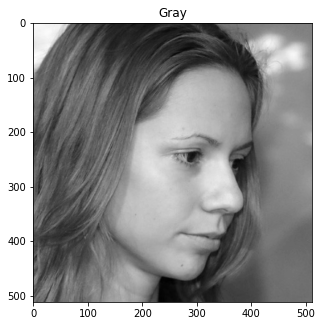

In [22]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman3.png')

img_, _, _, _ = crop_img(img, 200, 0, 444, 788)

img_, _, _, _, = resize_img(img_, 512, 512)

img_ = to_gray_img(img_)

woman1 = img_

print(woman1.dtype)
print(woman1.max())

show_gray(woman1)

# Meg van a képem, jöhet a hülyeség.

Menjünk végig a kép sorain, és mindegyiken csináljuk mega a Fourier Transformációt, vegyük a domináns frekvenciákat a többit tobjuk el és a domináns frekvenciák alapján rekonstruáljuk a képet.

In [23]:
# A kép
# woman1      <- 0-255
# woman2      <- 0-1

img = woman1.copy()

print(img.shape, img.min(), img.max())

(512, 512) 0.02570976307189542 0.9586084702435661


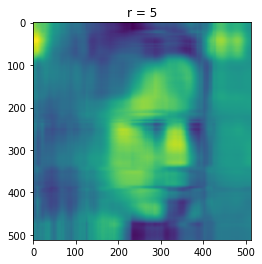

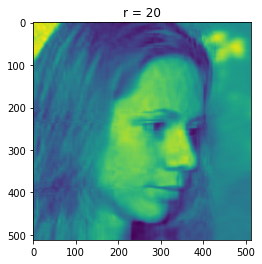

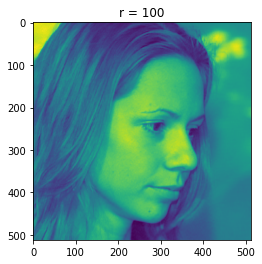

In [26]:

X = img.copy()

U, S, VT = np.linalg.svd(X, full_matrices=False)

S = np.diag(S)

j = 0

for r in (5, 20, 100):
    # Construct approximate image
    approximate = U[:,:r] @ S[0:r, :r] @ VT[:r,:]
    
    plt.figure(j+1)
    
    j += 1
    
    plt.imshow(approximate)
    
    plt.title('r = ' + str(r))
    plt.show()

In [39]:
from ipywidgets import interact
from ipywidgets import IntSlider, FloatSlider

def plot(r=10):
    
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    S = np.diag(S)

    # Construct approximate image
    approximate = U[:,:r] @ S[0:r, :r] @ VT[:r,:]

    plt.figure()
    plt.imshow(approximate)
    plt.title('r = ' + str(r))
    plt.show()
    

In [42]:
interact(plot, r=IntSlider(min=1, max=100, step=1, value=10));

interactive(children=(IntSlider(value=10, description='r', min=1), Output()), _dom_classes=('widget-interact',…

In [43]:
from ipywidgets import interact
from ipywidgets import IntSlider, FloatSlider

def plot(r=10, s=6):
    
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    S = np.diag(S)

    # Construct approximate image
    approximate = U[:,:r] @ S[0:r, :r] @ VT[:r,:]

    plt.figure(figsize=(s, s))
    plt.imshow(approximate)
    plt.title('r = ' + str(r))
    plt.show()
    

In [47]:
interact(plot, r=IntSlider(min=1, max=200, step=1, value=200), s=IntSlider(min=4, max=20, step=1, value=14));

interactive(children=(IntSlider(value=200, description='r', max=200, min=1), IntSlider(value=14, description='…

In [57]:
from ipywidgets import interact
from ipywidgets import IntSlider, FloatSlider

def plot(r=10):
    
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    S = np.diag(S)
    
    _ = min(np.shape(U)[0], np.shape(U)[1])

    # Construct approximate image
    approximate = U[:,:r] @ S[0:r, :r] @ VT[:r,:]
    approxi_max = U[:,:_] @ S[0:_, :_] @ VT[:_,:]
    
    diff = approxi_max - approximate

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
    ax0.imshow(approximate)
    ax0.set_title('r = ' + str(r))
    
    ax1.imshow(diff)
    plt.show()
    

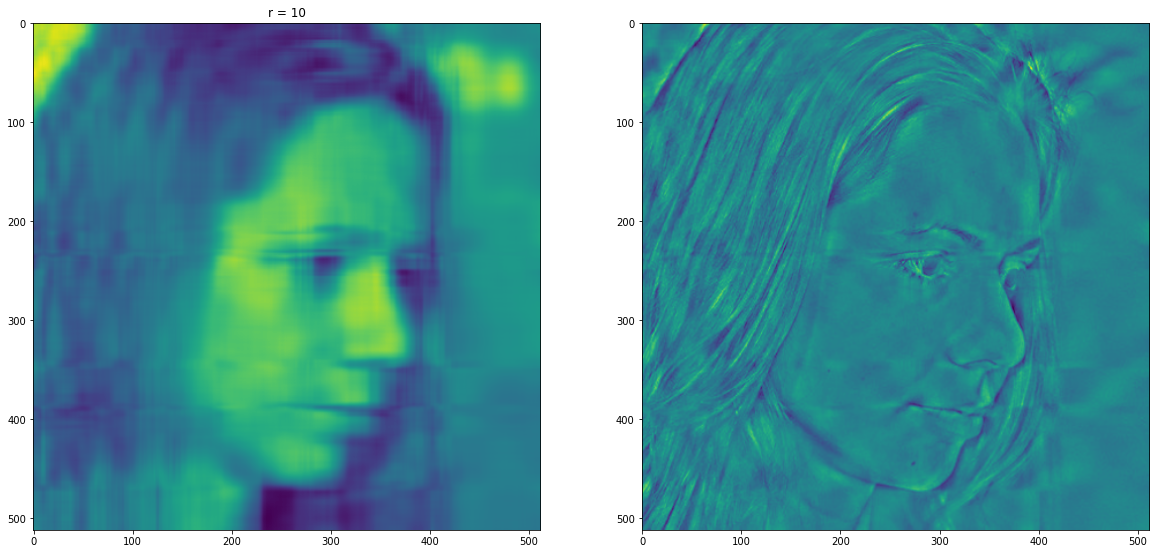

In [59]:
plot()

In [62]:
interact(plot, r=IntSlider(min=1, max=200, step=1, value=10));

interactive(children=(IntSlider(value=10, description='r', max=200, min=1), Output()), _dom_classes=('widget-i…

In [ ]:
x kén csinálni oyl, hogy végig megy az sigmákon mindjárt mutatom, hgoy és plottolja öket,

utána meg olyat, hoyg össze is adja ökett egymás után, hogy alakulnak, de ez már gyakorlatilag meg van (ez a fenti)

most csak olyatt akarok, hogy megmutatja öket egyenként

In [91]:
from ipywidgets import interact
from ipywidgets import IntSlider, FloatSlider

def plot(r=10):
    
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    S = np.diag(S)
    
    _ = min(np.shape(U)[0], np.shape(U)[1])

    # Construct approximate image
    # approximate = U[:,:r] @ S[0:r, :r] @ VT[:r,:]
    # approximate = U[:,0:r] @ S[0:r, 0:r] @ VT[0:r,:]
    approximate_p1 = U[:,:r] @ S[:r, :r] @ VT[:r,:]

    # approxi_max = U[:,:_] @ S[0:_, :_] @ VT[:_,:]
    approximate_n1 = U[:,:r+1] @ S[0:r+1, :r+1] @ VT[:r+1,:]
    
    diff = approximate_p1 - approximate_n1
    
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
    ax0.imshow(approximate_p1, vmin=0, vmax=1); ax0.set_title('r = ' + str(r))
    ax1.imshow(diff, vmin=-0.5, vmax=0.5); ax1.set_title('diff')
    ax2.imshow(approximate_n1, vmin=0, vmax=1); ax2.set_title('r = ' + str(r + 1))
    plt.show()
    

In [92]:
interact(plot, r=IntSlider(min=1, max=100, step=1, value=10));

interactive(children=(IntSlider(value=10, description='r', min=1), Output()), _dom_classes=('widget-interact',…

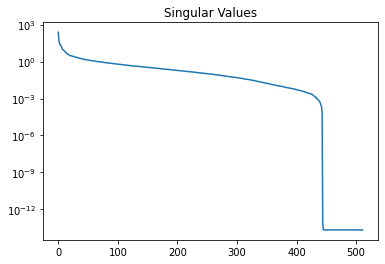

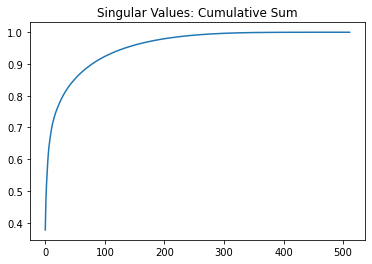

In [93]:
plt.figure()
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure()
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## Ugyan ez interaktívan



```
# JoDeMiro
```
